# Transformação de Variáveis (parte 1)

### Introdução
Neste notebook, exploraremos algumas técnicas de **transformação de variáveis**, que são passos fundamentais no pré-processamento de dados para **Machine Learning**. Muitos modelos de Machine Learning são negativamente afetados quando as variáveis têm diferentes escalas, o que pode levar a uma maior influência de algumas variáveis em detrimento de outras.

Além disso, alguns algoritmos funcionam melhor quando os dados seguem uma distribuição normal, enquanto outros podem ter desempenho ruim com dados não escalados.

Por exemplo, técnicas como regressão linear e redes neuronais frequentemente têm melhores resultados quando as variáveis estão normalizadas ou padronizadas. Por outro lado, algoritmos como árvores de decisão são menos sensíveis a esse tipo de transformação.

### Informação sobre o Conjunto de Dados
Este conjunto de dados foi obtido no [Kaggle](https://www.kaggle.com) e refere-se à qualidade do vinho tinto. Ele contém várias características físico-químicas de diferentes amostras de vinho, as quais são utilizadas para prever a qualidade do vinho. Você pode acessar o conjunto de dados [aqui](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset). As variáveis utilizadas neste exemplo são:

- **fixed acidity**: Acidez fixa do vinho.
- **citric acid**: Quantidade de ácido cítrico presente.
- **total sulfur dioxide**: Quantidade total de dióxido de enxofre.
- **alcohol**: Percentual de álcool presente no vinho.

### Objectivo
O objetivo da transformação de variáveis neste contexto é:
- **Normalizar ou padronizar** as características do conjunto de dados para garantir que cada variável contribua de maneira equilibrada para os modelos de Machine Learning.
- Melhorar o desempenho dos modelos que são sensíveis a escalas diferentes ou à falta de normalidade nos dados.


### Importação das Bibliotecas Necessárias
Nesta seção, importamos as bibliotecas essenciais para a análise de dados e visualização. Vamos utilizar o `numpy` para operações numéricas, `pandas` para manipulação de dados, `matplotlib` e `seaborn` para criar gráficos.


Se ainda não tiver instalado as bibliotecas abaixo, remova o `#` e execute a célu abaixola para instaras antes de continua.


In [36]:
# !pip install numpy pandas matplotlib seaborn scikit-learn

In [11]:
# Carregar as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

### Carregar o Conjunto de Dados
Aqui estamos a carregar o conjunto de dados e a selecionar algumas variáveis específicas para transformação.

Os dados foram obtidos no Kaggle. Pode aceder ao conjunto de da.o).


In [9]:
# Carregar o conjunto de dados a partir do link fornecido
file_url = 'https://raw.githubusercontent.com/DSAI-For-Moz/guia-pratico-machine-learning/a48385ef24e0ae3d14eb379cf807732ebdab2561/datasets/pre-processamento/winequality-red.csv'
wine = pd.read_csv(file_url, usecols=['fixed acidity', 'citric acid', 'total sulfur dioxide', 'alcohol'])

# Apresentar as primeiras linhas do conjunto de dados
print(wine.head())


   fixed acidity  citric acid  total sulfur dioxide  alcohol
0            7.4         0.00                  34.0      9.4
1            7.8         0.00                  67.0      9.8
2            7.8         0.04                  54.0      9.8
3           11.2         0.56                  60.0      9.8
4            7.4         0.00                  34.0      9.4


### Pré-processamento dos Dados
Antes de aplicar as técnicas de transformação, é importante visualizar e entender a distribuição dos dados. Vamos criar algumas funções auxiliares para isso.

In [15]:
# Função auxiliar para fazer gráficos antes e depois do dimensionamento (Comparação de distribuição)
def plot_transformation(original_data, transformed_data, title, feature_cols=['fixed acidity', 'citric acid', 'total sulfur dioxide', 'alcohol']):
    plt.figure(figsize=(16, 8))
    for i, col in enumerate(feature_cols, 1):
        plt.subplot(2, len(feature_cols), i)
        sns.histplot(original_data[col], kde=True, color='blue')
        plt.title(f'Original {col}')
        
        plt.subplot(2, len(feature_cols), i + len(feature_cols))
        sns.histplot(transformed_data[col], kde=True, color='red')
        plt.title(f'Transformed {col}')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [27]:
# Função auxiliar para fazer gráficos antes e depois do dimensionamento (Comparação de gama combinada)
def plot_combined_range_comparison(original_data, transformed_data, title, feature_cols=['fixed acidity', 'citric acid', 'total sulfur dioxide', 'alcohol']):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=original_data[feature_cols], palette='Blues')
    plt.title('Original Data')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=transformed_data[feature_cols], palette='Reds')
    plt.title('Transformed Data')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

### 1. Min-Max Scaling (Normalização)

Nesta etapa, aplicamos a normalização Min-Max para ajustar os valores das variáveis entre 0 e 1, garantindo que todas as variáveis estejam na mesma escala. Esta técnica é importante para modelos que são sensíveis a diferenças de escala.

In [39]:
# Aplicar a normalização Min-Max
minmax_scaler = MinMaxScaler()
wine_minmax = minmax_scaler.fit_transform(wine)
wine_minmax = pd.DataFrame(wine_minmax, columns=wine.columns)

## Visualização dos Dados Normalizados

Vamos agora plotar os dados para visualizar o efeito da normalização Min-Max nas variáveis. A visualização ajuda a entender melhor como os valores foram transformados.


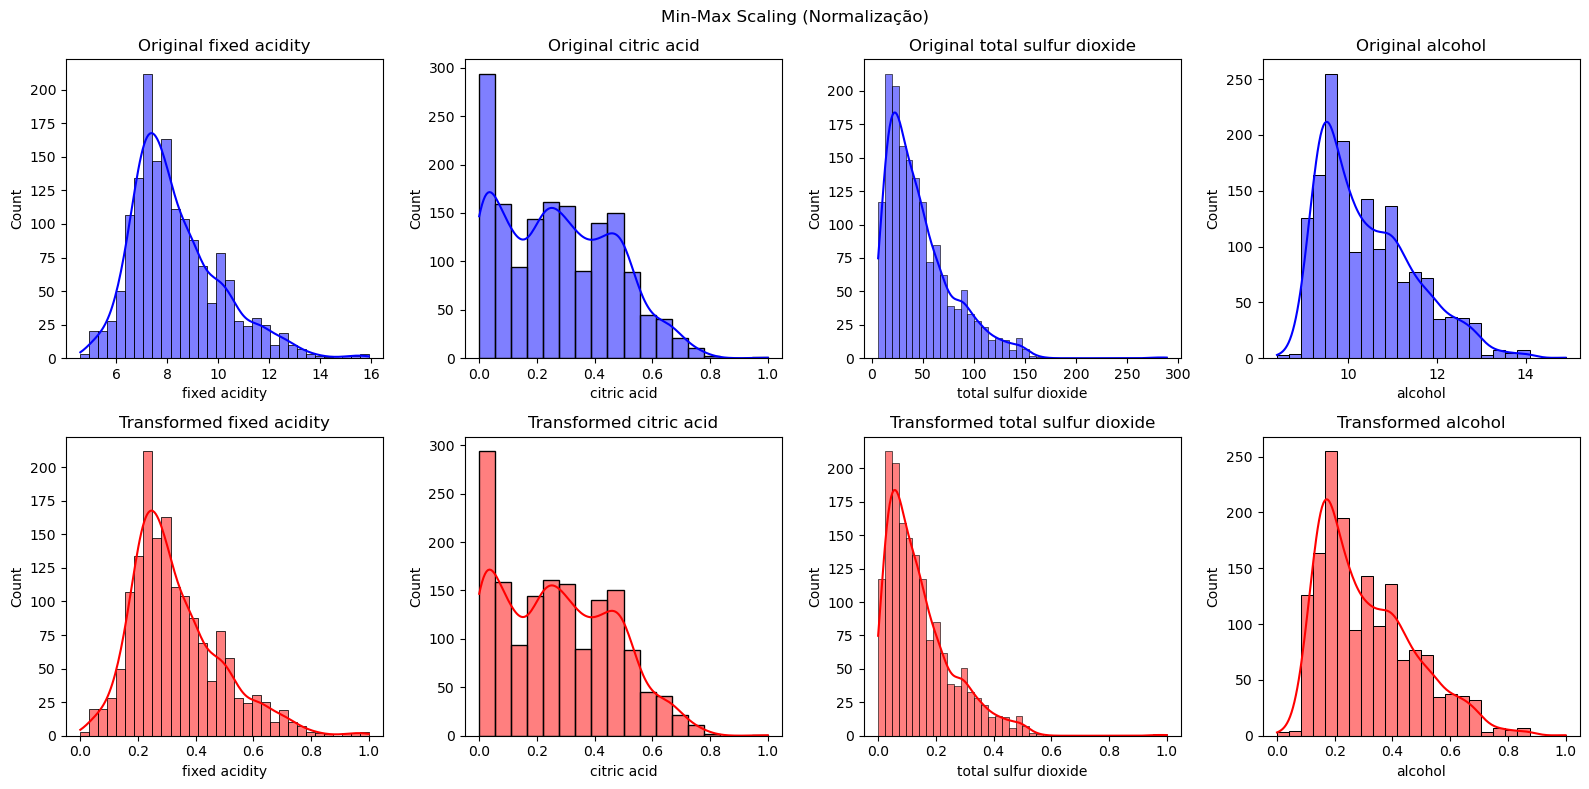

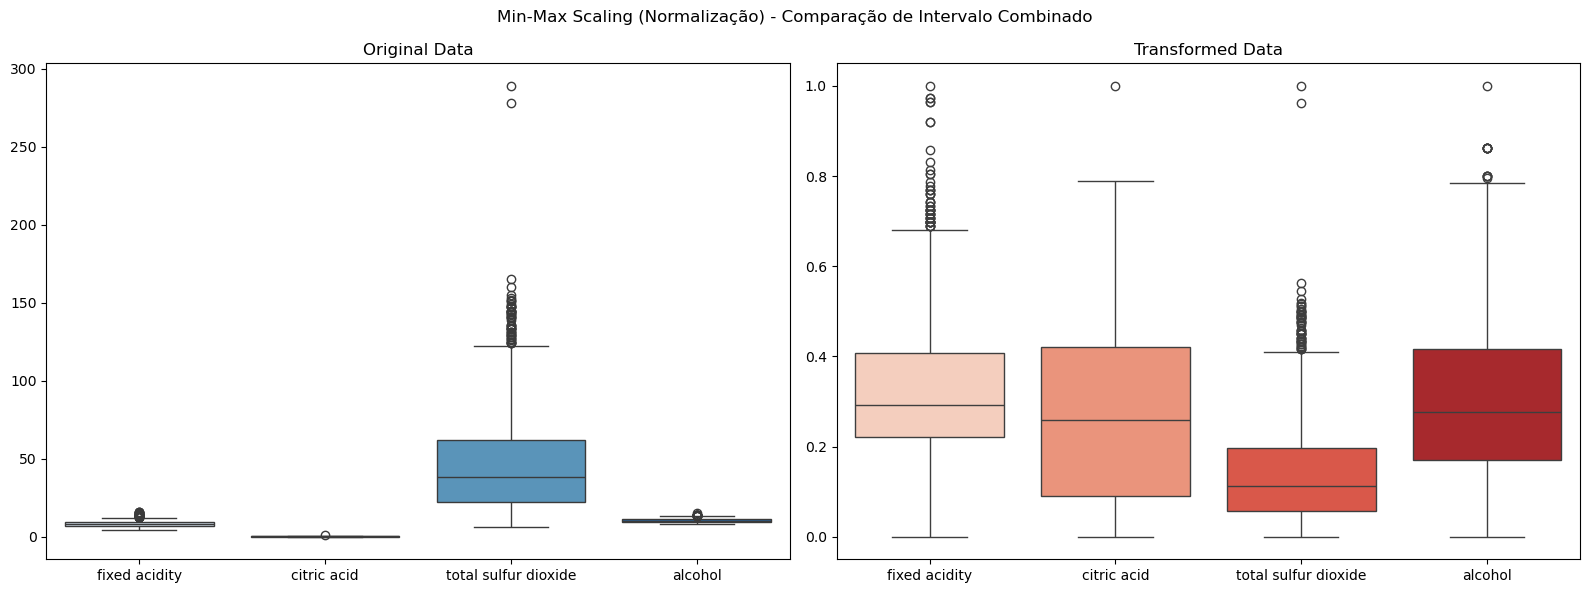

In [54]:
# Grafico com os dados normalizados
plot_transformation(wine, wine_minmax, 'Min-Max Scaling (Normalização)')
plot_combined_range_comparison(wine, wine_minmax, 'Min-Max Scaling (Normalização) - Comparação de Intervalo Combinado')

**Resultado:** 
Após a normalização Min-Max, podemos ver que todas as variáveis estão agora entre 0 e 1. Isso garante que nenhuma variável terá uma influência desproporcional nos modelos de Machine Learning.

### 2. Padronização usando Z-score
A padronização usando Z-score transforma os dados para que tenham média zero e desvio padrão igual a 1. Isso é útil quando os algoritmos assumem que os dados têm uma distribuição normal.

In [44]:
# Aplicar a padronização usando Z-score
standard_scaler = StandardScaler()
wine_standard = standard_scaler.fit_transform(wine)
wine_standard = pd.DataFrame(wine_standard, columns=wine.columns)

## Visualização dos Dados Padronizados

Vamos agora visualizar os dados para entender como a padronização Z-score afetou as variáveis. Esta visualização facilita a compreensão da transformação dos dados.

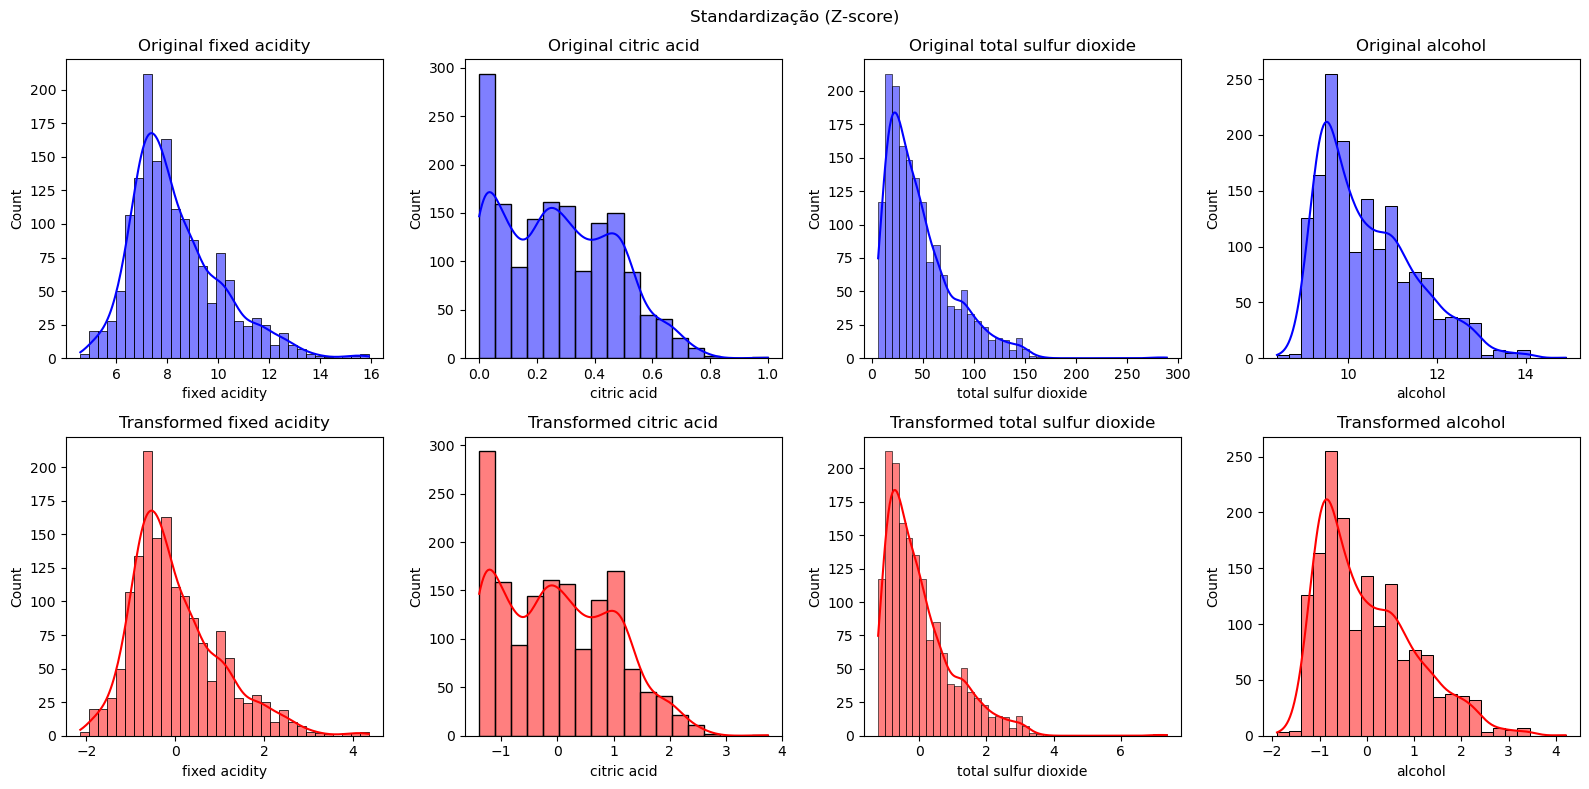

In [56]:
# Grafico com os dados padronizados
plot_transformation(wine, wine_standard, 'Standardização (Z-score)')

**Resultado:**
A padronização Z-score transformou os dados de modo que a média ficou em torno de zero e o desvio padrão em torno de um. No entanto, os histogramas mostram que a assimetria original dos dados foi, em grande parte, mantida. Isso indica que a padronização não foi suficiente para tornar a distribuição dos dados normal. A Z-score apenas garantiu que as variáveis tivessem a mesma escala, mas não mudou significativamente a forma das distribuições.

### 3. Transformação Box-Cox (Normalização)
A transformação Box-Cox é usada para aproximar os dados de uma distribuição normal, o que é particularmente útil quando há assimetrias. Adicionamos 1 aos valores para evitar problemas com valores zero ou negativos.

In [49]:
# Aplicar a transformação Box-Cox
power_transformer = PowerTransformer(method='box-cox')
wine_boxcox = power_transformer.fit_transform(wine + 1)  # Adicionar 1 para lidar com valores nulos ou negativos
wine_boxcox = pd.DataFrame(wine_boxcox, columns=wine.columns)

## Visualização dos Dados Transformados com Box-Cox

Vamos agora visualizar os dados para entender como a transformação Box-Cox afetou as variáveis. A visualização ajuda a compreender melhor o impacto da transformação.


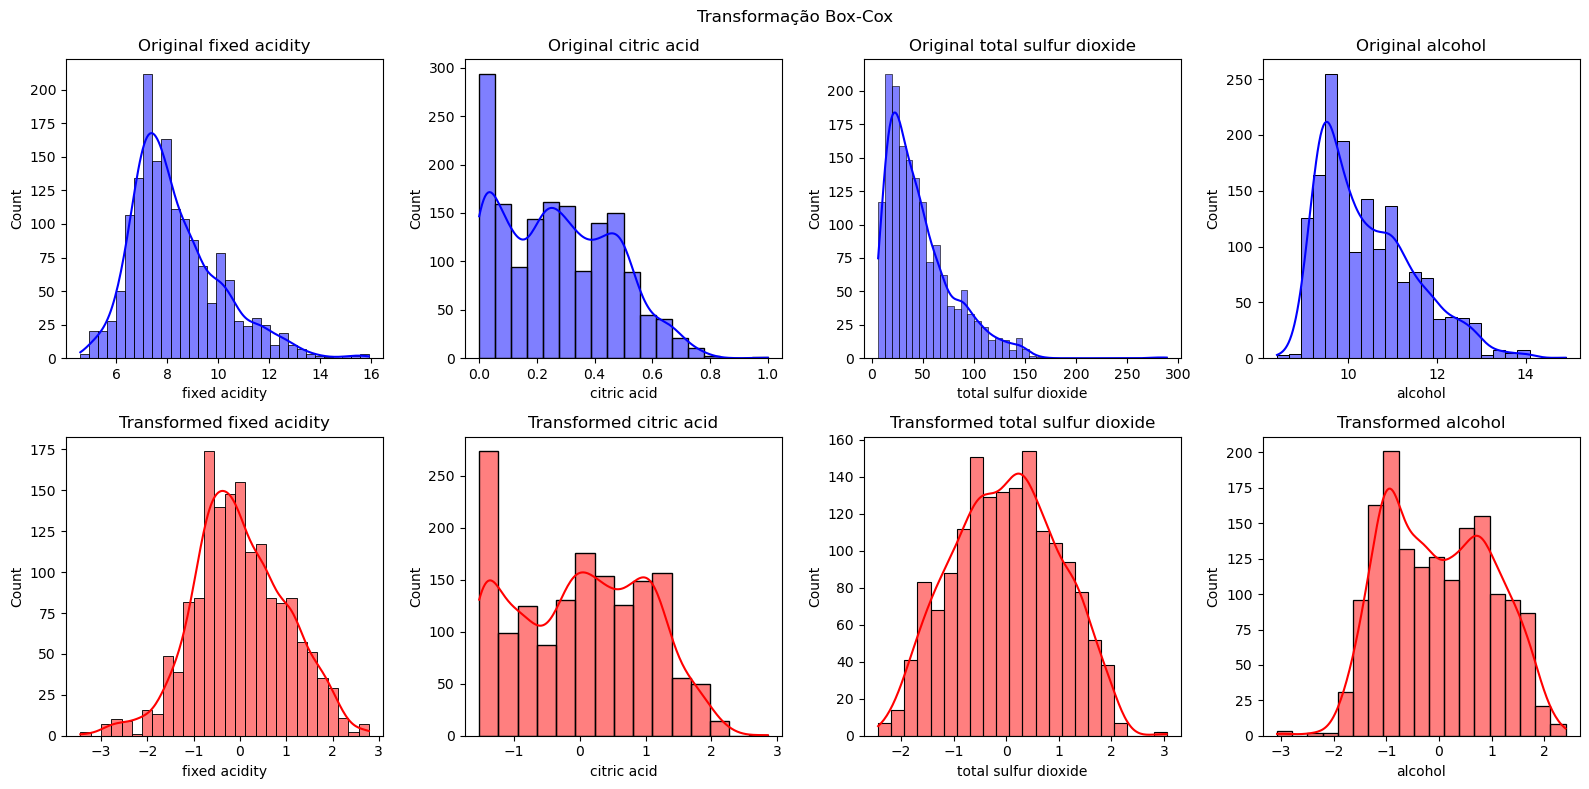

In [52]:
# Plotar os dados transformados com Box-Cox
plot_transformation(wine, wine_boxcox, 'Transformação Box-Cox')


**Resultado:** 
A transformação Box-Cox, por outro lado, fez um trabalho melhor em aproximar os dados de uma distribuição normal. Como podemos ver nos histogramas, os picos foram suavizados e a simetria foi melhorada em comparação com a transformação Z-score.
Essa transformação é mais eficaz para tornar os dados normais, o que pode beneficiar modelos que assumem essa distribuição, como regressões lineares e redes neurais.

### Conclusão
Neste notebook, demonstrámos três técnicas de transformação de variáveis: **Normalização Min-Max**, **Padronização Z-score**, e **Transformação Box-Cox**. Cada uma dessas técnicas tem suas aplicações e pode ser escolhida de acordo com o tipo de modelo de Machine Learning a ser utilizado. A escolha adequada da técnica de transformação pode melhorar significativamente o desempenho do modelo.

### Nota
Todos os dados utilizados neste notebook são puramente para **fins de demonstração**.

### Este notebook foi escrito por Simão Rafique

Pode seguir-me no [LinkedIn](https://www.linkedin.com/in/simão-rafique).